# Exam 4th of January 2024, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="0014-TKY"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_inversion` in order to produce samples from the below distribution using rejection sampling:

$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \frac{e^{x^2}-1}{e-1}, & 0 < x < 1 \\
        1, & x \geq 1
    \end{cases}
$$

2. [2p] Produce 100000 samples (**use fewer if it times-out and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. *(There is a timeout decorator on this function and if it takes more than 10 seconds to generate 100000 samples it will timeout and it will count as if you failed to generate.)*
3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2e^{x^2} x}{e-1} dx
$$
and store the result in `problem1_integral`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Fill in the remaining part of the function `problem1_inversion_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

In [2]:

# Part 1

#from Utils import timeout
import numpy as np 

#@timeout
def problem1_inversion(n_samples=1):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections
    #x = np.random.exponential(size=n_samples)
    x = np.random.uniform(low=0.0, high=1.0, size=n_samples)
     #Return a numpy array of length n_samples
    sample_array = np.empty(0)
    def target_distribution(x):
        if x <= 0:
            return 0
        elif 0 < x < 1:
            return (np.exp(x**2) - 1) / (np.exp(1) - 1)
        else:
            return 1


    for i in range(len(x)):
        u = np.random.uniform(0, 1)

        if u <= target_distribution(x[i]):
            sample_array = np.append(sample_array, x[i])
    return sample_array


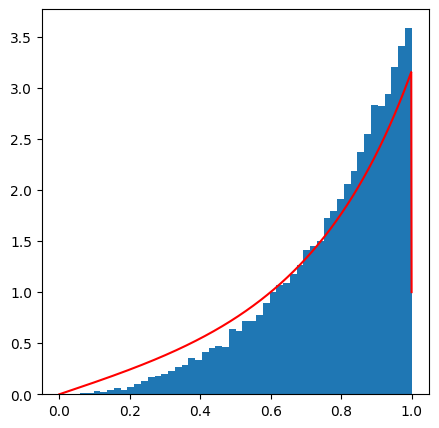

In [9]:
# Part 2
import matplotlib.pyplot as plt
from Utils import discrete_histogram
problem1_samples = problem1_inversion(n_samples=100000)
#Derive to get the pdf since we dont want the cdf
def true_density(x):
    if x <= 0:
        return 0
    elif 0 < x < 1:
        return (2 * x * np.exp(x**2)) / (np.exp(1) - 1)
    else:
        return 1
    
X_values = np.linspace(0, 1, 1000)
y_values = [true_density(x) for x in X_values]

plt.figure(figsize=(5,5))
plt.hist(problem1_samples, bins=50, density=True)
plt.plot(X_values, y_values, color='r', label='True Density')

plt.show()




In [13]:
# Part 3
import scipy.integrate as integrate
#result = integrate.quad(lambda x: np.sin(problem1_samples)*((2*np.exp(x**2)*x)/(np.exp(1)-1), 0, 1))
#Only need to use sin since we already have sampled f(x)
g_x = np.sin(problem1_samples)
problem1_integral = np.mean(g_x)
print(problem1_integral)



0.6907994637420726


In [18]:
# Part 4
from Utils import compute_confidence_interval_bounded

problem1_interval = compute_confidence_interval_bounded(g_x, 0.95, -1, 1)
problem1_interval = [problem1_interval[0], problem1_interval[1]]
print(problem1_interval)

[0.6833629692433981, 0.698235958240747]


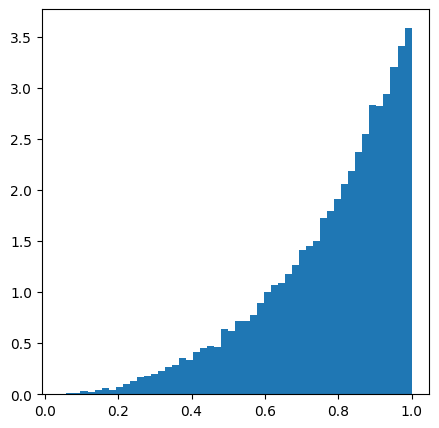

In [22]:
# Part 5
def true_density(x):
    if x <= 0:
        return 0
    elif 0 < x < 1:
        return 20 * np.exp(20 - (1/x)) * (1+(1/x))
    else:
        return 1
    
    
X_values = np.linspace(0, 1, 1000)
y_values = [true_density(x) for x in X_values]

plt.figure(figsize=(5,5))
plt.hist(problem1_samples, bins=50, density=True)
plt.show()
def problem1_inversion_2(n_samples=1):
    # Distribution from part 2
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections
    x = np.random.uniform(low=0.0, high=1.0, size=n_samples)

    def target_distribution(x):
        if x <= 0:
            return 0
        elif 0 < x < 1:
            return 20*x * np.exp(20 - (1/x))
        else:
            return 1
    samples = np.empty(0)
    x_proposal = np.random.uniform(0, 1/20, size=n_samples)
    
    for i in range(len(x)):
        u = np.random.uniform(0, 1/20)

        if u <= target_distribution(x_proposal[i]):
            np.append(samples, x_proposal[i])
    # Return a numpy array of length n_samples
    return samples

---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.

In [20]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_inversion(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_integral, float)) 
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Good, your problem1_inversion_2 returns a numpy array


---
## Exam vB, PROBLEM 2
Maximum Points = 13


Let us build a proportional model ($\mathbb{P}(Y=1 \mid X) = G(\beta_0+\beta \cdot X)$ where $G$ is the logistic function) for the spam vs not spam data. Here we assume that the features are presence vs not presence of a word, let $X_1,X_2,X_3$ denote the presence (1) or absence (0) of the words $("free", "prize", "win")$.

1. [2p] Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has shape (n_emails,3) where each feature in `problem2_X` corresponds to $X_1,X_2,X_3$ from above, `problem2_Y` which has shape **(n_emails,)** and consists of a $1$ if the email is spam and $0$ if it is not. Split this data into a train-calibration-test sets where we have the split $40\%$, $20\%$, $40\%$, put this data in the designated variables in the code cell.

2. [4p] Follow the calculation from the lecture notes where we derive the logistic regression and implement the final loss function inside the class `ProportionalSpam`. You can use the `Test` cell to check that it gives the correct value for a test-point.

3. [4p] Train the model `problem2_ps` on the training data. The goal is to calibrate the probabilities output from the model. Start by creating a new variable `problem2_X_pred` (shape `(n_samples,1)`) which consists of the predictions of `problem2_ps` on the calibration dataset. Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`, store this trained model in `problem2_calibrator`.

4. [3p] Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make final predictions on the testing data, store the prediction in `problem2_final_predictions`. Compute the $0-1$ test-loss and store it in `problem2_01_loss` and provide a $99\%$ confidence interval of it, store this in the variable `problem2_interval`, this should again be a tuple as in **problem1**.

In [45]:
# Part 1
import pandas as pd
import csv
from Utils import load_sms
import numpy as np
from Utils import train_test_validation
#with open("data/spam.csv") as f:
#    rows = [row for row in csv.reader(f)]

#print(rows)


sms = load_sms()
x1 = "free"
x2 = "prize"
x3 = "win"

problem2_X = np.zeros([len(sms),3])
problem2_y = np.zeros(len(sms))

for i in range(len(sms)):
    words =  sms[i][0].lower().split()
    spam = sms[i][1]
    if x1 in words:
        problem2_X[i][0] = 1
    if x2 in words:
        problem2_X[i][1] = 1
    if x3 in words:
        problem2_X[i][2] = 1
    if spam == 1:
        problem2_y[i] = spam


    
         
X_train, X_test, X_valid, Y_train, Y_test, Y_valid = train_test_validation(problem2_X, problem2_y, test_size=0.2, validation_size = 0.4) 
    
    
problem2_X_train = X_train
problem2_X_calib = X_valid
problem2_X_test = X_test

problem2_Y_train = Y_train
problem2_Y_calib = Y_valid
problem2_Y_test = Y_test

print(problem2_X_train.shape,problem2_X_calib.shape,problem2_X_test.shape,problem2_Y_train.shape,problem2_Y_calib.shape,problem2_Y_test.shape)


(2228, 3) (2230, 3) (1114, 3) (2228,) (2230,) (1114,)


In [46]:
# Part 2

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        
        #Use the logistic loss
        G = lambda x: np.exp(x)/(1+np.exp(x))

        z = np.dot(X,coeffs[1:])+coeffs[0]

        p_x = G(z)
        epsilon = 1e-10

        loss = -np.sum(Y*np.log(p_x+epsilon)+(1-Y)*np.log(1-p_x+epsilon))

        return loss

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
            return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 # This rounding is to help you with the calibration


In [55]:
# Part 3
from sklearn.tree import DecisionTreeRegressor
problem2_ps = ProportionalSpam()

problem2_ps.fit(problem2_X_train,problem2_Y_train)

problem2_X_pred = problem2_ps.predict(problem2_X_calib)

problem2_X_pred = problem2_X_pred.reshape(-1,1)





problem2_dt = DecisionTreeRegressor()
problem2_dt.fit(problem2_X_pred,problem2_Y_calib)


problem2_calibrator = problem2_dt



In [64]:
# Part 4
from sklearn.metrics import accuracy_score
from Utils import compute_confidence_interval_bounded
# These are the predicted probabilities
test_probs = problem2_ps.predict(problem2_X_test)
test_probs_calibrated = problem2_calibrator.predict(test_probs.reshape(-1,1))
test_probs_calibrated = np.array(test_probs_calibrated).flatten()
problem2_final_predictions = (test_probs_calibrated >= 0.5).astype(int)




# In order to compute this loss we first need to convert the predicted probabilities to a decision
# recall the Bayes classifier?
problem2_01_loss = 1 - accuracy_score(problem2_Y_test, problem2_final_predictions)
n_test_samples = len(problem2_Y_test)
#epsilon = np.sqrt(np.log(2 / 0.01) / (2 * n_test_samples))
alpha = 0.01
b = 1
epsilon = b*np.sqrt(-1/(2*n)*np.log((alpha)/2))  # Hoeffding's inequality for 99% confidence interval
lower_bound = max(0, problem2_01_loss - epsilon)
upper_bound = min(1, problem2_01_loss + epsilon)
problem2_interval = (lower_bound, upper_bound)
print(problem2_interval)

# Recall the interval is given as a tuple (a,b) or a list [a,b]


(0.05985223914177912, 0.1573829493680951)


---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.

In [ ]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
    assert (np.abs(test_loss-1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following four Markov chains, answer each question for all chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>
<img width="400px" src="pictures/MarkovC.png">Markov chain C</img>
<img width="400px" src="pictures/MarkovD.png">Markov chain D</img>

1. [2p] What is the transition matrix?
2. [2p] Is the Markov chain irreducible?
3. [3p] Is the Markov chain aperiodic? What is the period for each state?
4. [3p] Does the Markov chain have a stationary distribution, and if so, what is it?
5. [3p] Is the Markov chain reversible?

In [16]:
# PART 1
import numpy as np
#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

problem3_A    = np.array([[0.8,0.2,0,0],
                          [0.6,0.2,0.2,0],
                          [0,0.4,0,0.6],
                          [0,0,0.8,0.2]])
print(problem3_A.shape)
problem3_B    = np.array([[0.2,0,0,0.8],
                         [0,0,1,0],
                         [0,1,0,0],
                         [0.5,0,0.5,0]])
print(problem3_B.shape)
                          
problem3_C    = np.array([[0.2,0.3,0,0,0.5],
                         [0.2,0.2,0.6,0,0],
                         [0,0.4,0,0.6,0],
                         [0,0,0,0.6,0.4],
                         [0,0,0,0.4,0.6]])
print(problem3_C.shape)
problem3_D    = np.array([[0.8,0.2,0,0],
                         [0.6,0.2,0.2,0],
                         [0,0.4,0,0.6],
                         [0.1,0,0.7,0.2]])

print(problem3_D.shape)

(4, 4)
(4, 4)
(5, 5)
(4, 4)


In [66]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False

problem3_A_irreducible = True
problem3_B_irreducible = True
problem3_C_irreducible = False
problem3_D_irreducible = True


In [67]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False
#Suppose that you can go from state i to state i in l steps,
#i.e., p(l)ii>0. Also suppose that p(m)ii>0. If gcd(l,m)=1, then state i is aperiodic.
#if d

problem3_A_is_aperiodic = True
problem3_B_is_aperiodic = False
problem3_C_is_aperiodic = True
problem3_D_is_aperiodic = True

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

problem3_A_periods = np.array([1,1,2,1])
problem3_B_periods = np.array([2,2,2,2])
problem3_C_periods = np.array([1,1,2,1,1])
problem3_D_periods = np.array([1,1,2,1])



In [68]:
# PART 4
#------------------------STATIONARY DISTRIBUTION-----------------
# Answer each one with a True or False
evalsA,evecsA = np.linalg.eig(problem3_A.T)
evalsB,evecsB = np.linalg.eig(problem3_B.T)
evalsC,evecsC = np.linalg.eig(problem3_C.T)
evalsD,evecsD = np.linalg.eig(problem3_D.T)
print(evalsA)
print(evalsB)
print(evalsC)
print(evalsD)
first_evecA = evecsA[:,2]
problem1_stationaryA = np.array(first_evecA) / np.sum(first_evecA)

first_evecB = evecsB[:,3]
problem1_stationaryB = np.array(first_evecB) / np.sum(first_evecB)

first_evecC = evecsC[:,1]
problem1_stationaryC = np.array(first_evecC) / np.sum(first_evecC)

first_evecD = evecsD[:,2]
problem1_stationaryD = np.array(first_evecD) / np.sum(first_evecD)




problem3_A_has_stationary = True
problem3_B_has_stationary = True
problem3_C_has_stationary = True
problem3_D_has_stationary = True

 #Answer the following with the stationary distribution as a numpy array of shape (n_states,)
 #if the Markov chain has a stationary distribution otherwise answer with False

problem3_A_stationary_dist = problem1_stationaryA
problem3_B_stationary_dist = problem1_stationaryB
problem3_C_stationary_dist = problem1_stationaryC
problem3_D_stationary_dist = problem1_stationaryD



NameError: name 'problem3_A' is not defined

In [ ]:
# PART 5
#------------------------REVERSIBLE-----------------
# Answer each one with a True or False

problem3_A_is_reversible = True
problem3_B_is_reversible = False
problem3_C_is_reversible = False
problem3_D_is_reversible = True